# Project 2
## Task 1: KMeans Clustering

In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

wifi_data = pd.read_csv('wifi_localization.txt',sep='\t',names=['1','2','3','4','5','6','7','Room'])
wifi_data.head()

,1,2,3,4,5,6,7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


In [2]:
x = wifi_data[['1','2','3','4','5','6','7']]
y = wifi_data['Room']-1

task1_model = KMeans(n_clusters=4)
clusters = task1_model.fit_predict(x)

centers = task1_model.cluster_centers_
print(*[center for center in centers],sep='\n')

/mnt/linuxlab/home/wtownsend2/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[-60.13346614 -55.20517928 -50.64940239 -61.28286853 -49.46613546
 -87.02191235 -86.99800797]
[-35.43058824 -55.93411765 -55.72470588 -36.69411765 -67.32235294
 -71.59294118 -72.56941176]
[-62.482 -56.312 -60.566 -64.204 -70.278 -82.956 -84.072]
[-49.17102967 -55.15881326 -53.29144852 -50.03839442 -64.04537522
 -80.94240838 -81.85340314]


In [3]:
from scipy.stats import mode

# code helps use get the true labels of the clusters to accurately get an
# accuracy score
labels = np.zeros_like(clusters)
for i in range(4):
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]

print('Average Accuracy:',str(accuracy_score(y,labels)*100)+'%')

Average Accuracy: 95.45%


/tmp/ipykernel_125301/4257478782.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y[mask])[0]


Text(0.5, 1.0, 'Confusion Matrix')

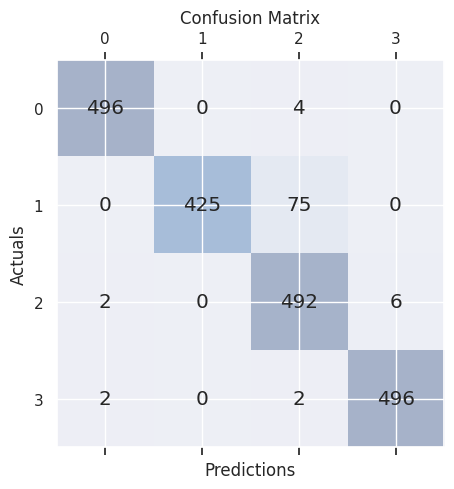

In [4]:
cmatrix = confusion_matrix(y,labels)
fig, ax = plt.subplots(figsize=(5, 6))
ax.matshow(cmatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cmatrix.shape[0]):
    for j in range(cmatrix.shape[1]):
        ax.text(x=j, y=i,s=cmatrix[i, j], va='center', ha='center', size='large')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix KMeans Clustering')

In [5]:
# these get use the accuracies of each using the confusion matrix above by divding the diagonals (our correctly predicted in each room/cluster)
# by the total (accomplished by summing each row in the matrix (the actuals))
actuals = np.diagonal(cmatrix)
test = []
for i in range(len(actuals)):
    total = sum([cmatrix[i][j]for j in range(len(cmatrix))])
    avg = actuals[i]/total*100
    test.append(avg)
    print('Room',i+1,'Accuracy:',str(avg)+'%')

Room 1 Accuracy: 99.2%
Room 2 Accuracy: 85.0%
Room 3 Accuracy: 98.4%
Room 4 Accuracy: 99.2%


# Task 2: PCA Analysis

In [50]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
max_components = 1
flag = False
while max_components<64:
    pca = PCA(n_components=max_components)
    x = pca.fit_transform(digits.data)
    y = digits.target
    if sum(pca.explained_variance_ratio_)>=0.9:
        flag=True
        break
    max_components+=1
if flag:
    print('Components required for 90% variance:',max_components)
else:
    print('90% variance not reached.(maximum components reached)')

Components required for 90% variance: 21


In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold

data = digits.data.tolist()
target = digits.target
for i in range(len(target)):
    data[i].append(target[i])

df = pd.DataFrame(data).drop(columns=[i for i in range(21,64)],inplace=False)
X = df[[i for i in range(0,21)]].values
Y = df[64].values

knn = KNeighborsClassifier(n_neighbors=17)
kf = KFold(n_splits=10, random_state=None)
print("CVT Average accuracy (folds=10): {}".format(cross_val_score(knn,X,Y,cv=kf).mean()))

CVT Average accuracy (folds=10): 0.7106579764121663


Text(0.5, 1.0, 'Confusion Matrix Cross Validation Test')

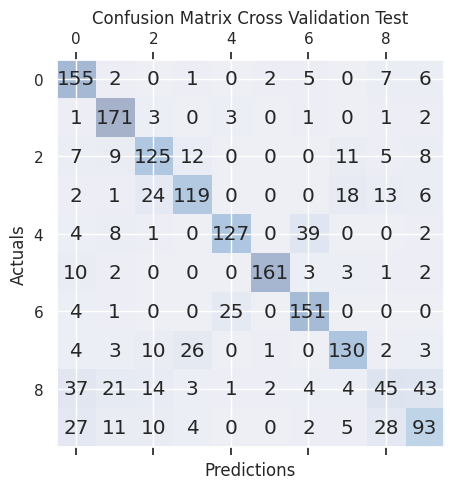

In [78]:
predict = cross_val_predict(knn,X,Y,cv=kf)

cmatrix = confusion_matrix(Y,predict)
fig, ax = plt.subplots(figsize=(5, 6))
ax.matshow(cmatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cmatrix.shape[0]):
    for j in range(cmatrix.shape[1]):
        ax.text(x=j, y=i,s=cmatrix[i, j], va='center', ha='center', size='large')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix Cross Validation Test')

# Task 3: Regression

In [79]:
housing_data = pd.read_csv('housing.csv')
housing_data = housing_data.drop(columns=['ocean_proximity'])
housing_data.corr()['median_house_value'][['housing_median_age','total_rooms','total_bedrooms','population','median_income']]

housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
median_income         0.688075
Name: median_house_value, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = housing_data[['housing_median_age','total_rooms','median_income']]
y = housing_data['median_house_value']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)

In [10]:
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)
y_predict = lin_model.predict(x_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MAE:',mean_absolute_error(y_test, y_predict))
print('MSE:',mean_squared_error(y_test, y_predict))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_predict)))
print('\nAverage Accuracy:',str(lin_model.score(x_test,y_test)*100) + '%')

MAE: 60378.62097652892
MSE: 6607470379.44292
RMSE: 81286.34805084381

Average Accuracy: 50.45117874828839%
